# Titanic Project Prediction

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


Importing the Dependencies

In [202]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



# data analysis and wrangling
import pandas as pds
import numpy as npy
import random as rndm

# visualization
import seaborn as snsb
import matplotlib.pyplot as pyplt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#### Data Collection & Processing 

First we need to import the dataset by reeading the location file and  loading  the dataset into dataframe

In [203]:
# load the data from csv file to Pandas DataFrame
train_data = pds.read_csv('C:/Users/lenovo/Datatrained Machined Learning Projects/Titanic_Project/titanic ds/titanic_train.csv')

Printing the first 5 rows of the dataset

In [204]:
# printing the first 5 rows of the dataframe
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Shape of the data sees the data matrix

In [205]:
# number of rows and Columns
train_data.shape

(891, 12)

In [206]:
# getting some informations about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
# check the number of missing values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the Missing values
To handle the missing values we have to drop some columns and filling some missing data with mean and mode to age and embarked column

In [208]:
# drop the "Cabin" column from the dataframe
train_data = train_data.drop(columns='Cabin', axis=1)

In [209]:
# replacing the missing values in "Age" column with mean value
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [210]:
# finding the mode value of "Embarked" column
print(train_data['Embarked'].mode())

0    S
dtype: object


In [211]:
print(train_data['Embarked'].mode()[0])

S


In [212]:
# replacing the missing values in "Embarked" column with mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

replacing the missing values and filling it with mode.

In [213]:
# check the number of missing values in each column
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis and Visulization

In [214]:
# getting some statistical measures about the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [215]:
# finding the number of people survived and not survived
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [216]:

snsb.set()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

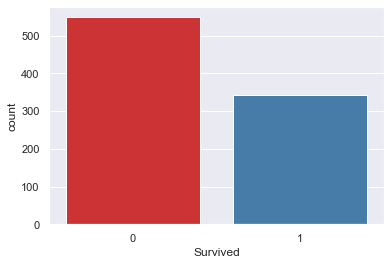

In [217]:
# making a count plot for "Survived" column
snsb.countplot('Survived', data=train_data, palette= 'Set1')

In [218]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

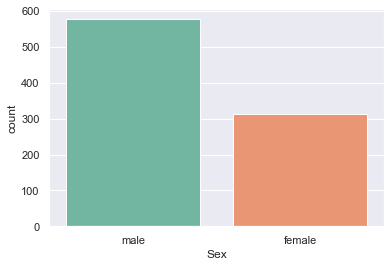

In [219]:
# making a count plot for "Sex" column
snsb.countplot('Sex', data=train_data, palette = 'Set2')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

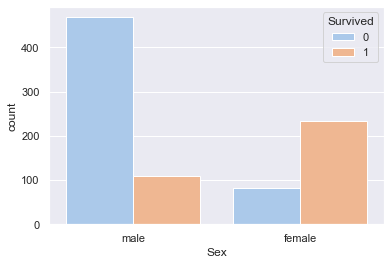

In [220]:
# number of survivors Gender wise
snsb.countplot('Sex', hue='Survived', data=train_data, palette = 'pastel')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

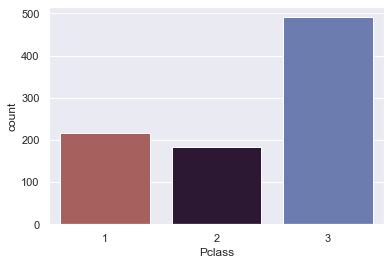

In [221]:
# making a count plot for "Pclass" column
snsb.countplot('Pclass', data=train_data,palette = 'twilight_r')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

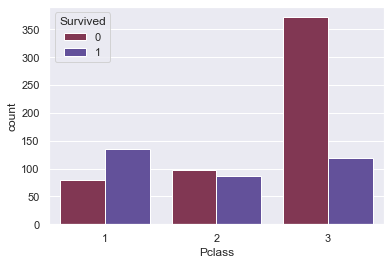

In [222]:
snsb.countplot('Pclass', hue='Survived', data=train_data, palette = 'twilight_r')

### Encoding the Categorical Columns from the dataset 

Encoding some of the categorical columns  from the dataset so that we get some sppecific values of the data in categorical format 

In [223]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [224]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [225]:
# converting categorical Columns

train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [226]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


### Separating features & Target variable

In [227]:
X = train_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = train_data['Survived']

In [228]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [229]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Splitting the data of X and Y into Training data & Test data 

Now we have to split the data into the train data and test data for the model classification and the modle accuracy prediction.

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [231]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

We are now  performing the  categorgy of ML which is supervised learning as we can train our models in the given dataset. Using the supervised machine learning including the regression and classification, we can choose our desired model according to the accuracy.

#### Random Forest Regression.

Random Forest Regression is the  famous regrssion where decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees.


In [232]:
randomforestclass = RandomForestClassifier(n_estimators=100)
randomforestclass.fit(X_train, Y_train)
Y_pred = randomforestclass.predict(X_test)
randomforestclass.score(X_train, Y_train)
accuracyrandomforestclass = round(randomforestclass.score(X_train, Y_train) * 100, 5)
print(accuracyrandomforestclass,'%')

98.59551 %


#### Logistic Regression 
Logistic Reression measures the decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees. #reference Wikipedia

In [233]:
logreggression = LogisticRegression()
logreggression.fit(X_train, Y_train)
Y_pred = logreggression.predict(X_test)
acc_log_regg = round(logreggression.score(X_train, Y_train) * 100, 5,) 
print(acc_log_regg, '%')

80.75843 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [234]:
coeffdf = pds.DataFrame(train_data.columns.delete(0))
coeffdf.columns = ['Feature']
coeffdf["Correlation"] = pds.Series(logreggression.coef_[0])

coeffdf.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.667484
6,Parch,0.221969
4,Age,0.009414
5,SibSp,0.002213
2,Name,-0.045321
3,Sex,-0.377400
0,Survived,-1.128884
7,Ticket,NaN
8,Fare,NaN
9,Embarked,NaN


By using the Logistic Regression we can validate our assumptions and decisions as feature creating and completing our goals. It can be done by the coeifficients of feature in the decision functions. 
1. The columns of 'SEX' is high +ve coeifficient, implying it as value increase.
2. Inversely as the 'PClass' increase, probablity of SUrvived = 1 decrease.
3. 'Age ' cloumn is a good artificial intelligent to model.

### Decision Tree Classifier ()
Decisions tress (DTs) are the most powerful non-parametric supervised learning method. They can be used for the classification and regression tasks. The main goal of DTs is to create a model predicting target variable value by learning simple decision rules deduced from the data features. Decision trees have two main entities; one is root node, where the data splits, and other is decision nodes or leaves, where we got final output.

In [235]:
# Decision Tree

decisiontreenet = DecisionTreeClassifier()
decisiontreenet.fit(X_train, Y_train)
Y_pred = decisiontreenet.predict(X_test)
accuracydecisiontree = round(decisiontreenet.score(X_train, Y_train) * 100, 6)
print(accuracydecisiontree,'%')

98.595506 %


#### Gaussian Naive Bayes


    Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [236]:
# Gaussian Naive Bayes

gaussianNbayes = GaussianNB()
gaussianNbayes.fit(X_train, Y_train)
Y_pred = gaussianNbayes.predict(X_test)
accuracygaussian = round(gaussianNbayes.score(X_train, Y_train) * 100, 6)
print(accuracygaussian,'%')

79.353933 %


#### K Neighbour Classifier
    In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.
    K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.


In [237]:
# K Neighbour Classifier

kNClass = KNeighborsClassifier(n_neighbors = 3)
kNClass.fit(X_train, Y_train)
Y_pred = kNClass.predict(X_test)
accuracyknn = round(kNClass.score(X_train, Y_train) * 100, 6)
print(accuracyknn,'%')

84.550562 %


#### Support Vector Machine
    SVM or support vector machines are supervised learning models that analyze data and recognize patterns on its own. They are used for both classification and regression analysis.
    An SVM model is the representation of the dataset as points in space so that the example of the separate categories is divided by a clear gap which is as wide as possible.

In [238]:
# Support Vector Machines

svectorc = SVC()
svectorc.fit(X_train, Y_train)
Y_pred = svectorc.predict(X_test)
accuracysvectorc = round(svectorc.score(X_train, Y_train) * 100, 6)
print(accuracysvectorc,'%')

67.977528 %


#### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. Since Randoom Forest and Decision Tree scores the same values therefore we choose the Random Forest Regression Classifier to evaluate our prediction. 

In [239]:
models = pds.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [accuracysvectorc, accuracyknn, acc_log_regg, 
              accuracyrandomforestclass, accuracygaussian,  accuracydecisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.595510
5,Decision Tree,98.595506
1,KNN,84.550562
2,Logistic Regression,80.758430
4,Naive Bayes,79.353933
0,Support Vector Machines,67.977528


In [240]:
import pickle
pickle.dump(accuracyrandomforestclass, open("RandomForestClassifier.pkl", "wb"))